In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1da3278c380>)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [3]:
med_df = pd.read_csv('medical.csv')
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


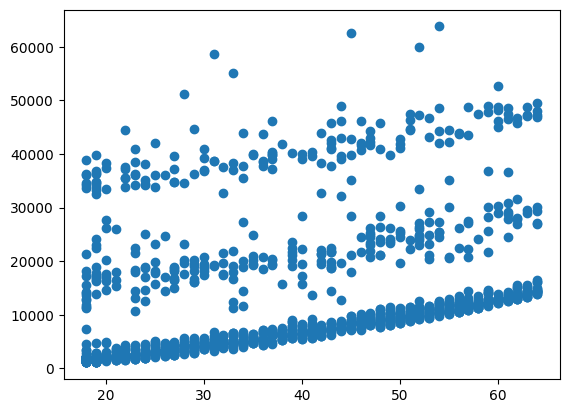

In [4]:
plt.scatter(med_df.age,med_df.charges)
plt.show()

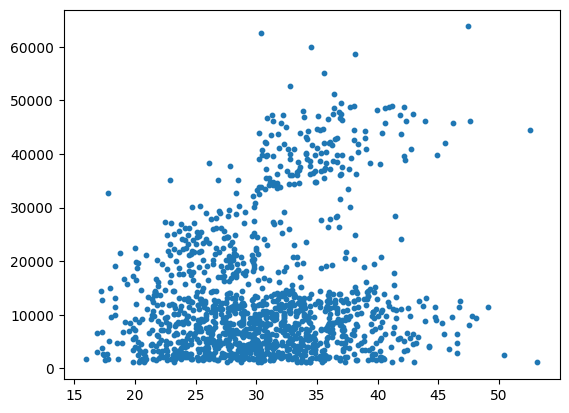

In [5]:
plt.scatter(med_df.bmi,med_df.charges,s=10)
plt.show()

In [6]:
smoker_values = {'no': 0, 'yes': 1}
med_df['smoker_numeric'] = med_df.smoker.map(smoker_values)
med_df.charges.corr(med_df.smoker_numeric)

np.float64(0.7872514304984782)

In [7]:
med_df.charges.corr(med_df.age)

np.float64(0.2990081933306476)

In [8]:
def estimate(age,w,b):
    return age*w + b

In [9]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [10]:
non_smoker_df = med_df[med_df.smoker == 'no']

In [11]:
def try_para(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    pred = estimate(ages, w, b)
    
    plt.plot(ages, pred, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, pred)
    print("RMSE Loss: ", loss)

RMSE Loss:  4685.949631332452


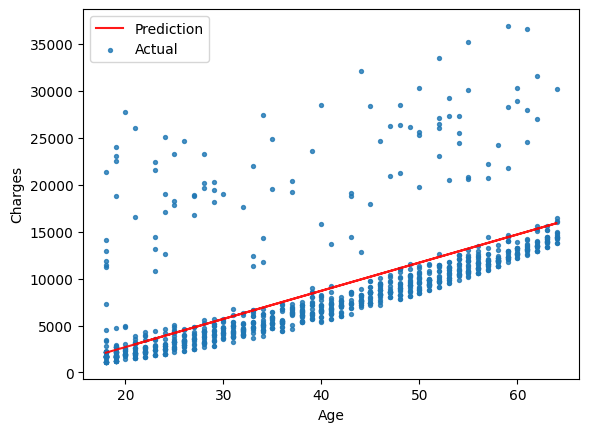

In [12]:
try_para(300,-3300)

## Linear_Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [15]:
model.coef_

array([267.24891283])

In [16]:
model.intercept_

np.float64(-2091.4205565650864)

In [17]:
rmse(targets,predictions)

np.float64(4662.505766636395)

RMSE Loss:  4662.505766636395


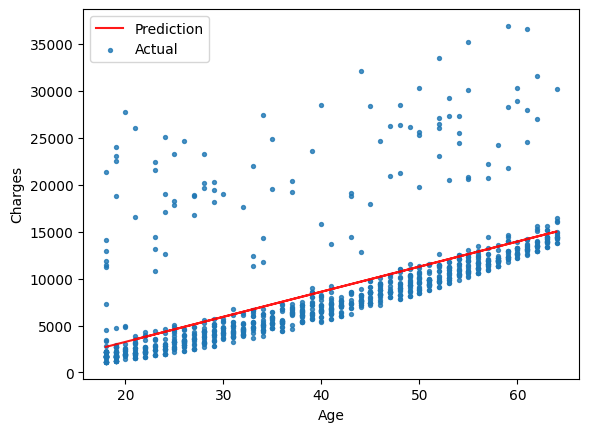

In [18]:
try_para(model.coef_,model.intercept_)

In [19]:
model.predict([[40],[60]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 8598.53595668, 13943.51421331])

# now with other parameters

In [20]:
inputs, targets = non_smoker_df[['age', 'bmi','children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [21]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [22]:
model.intercept_

np.float64(-2809.297603223591)

In [23]:
smoker_codes = {'no': 0, 'yes': 1}
med_df['smoker_code'] = med_df.smoker.map(smoker_codes)

In [24]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [25]:
inputs, targets = med_df[['age', 'bmi','children','smoker_code']], med_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [26]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(med_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [27]:
one_hot = enc.transform(med_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [28]:
med_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [29]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0


In [30]:
sex_codes = {'female': 0, 'male': 1}
med_df['sex_code'] = med_df.sex.map(sex_codes)

In [31]:
input_cols = ['age', 'bmi', 'children', 'smoker_code','sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = med_df[input_cols], med_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


# test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.15)

In [34]:
model = LinearRegression().fit(inputs_train, targets_train)

pred = model.predict(inputs_train)

loss = rmse(targets_train, pred)
print('Train Loss:', loss)

Train Loss: 5818.217346557082


In [35]:
predictions_test = model.predict(inputs_test)

loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 7218.852782763976


In [36]:
#input_cols = ['age', 'bmi', 'children', 'smoker_code','sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
model.predict([[23,28,0,1,1,0,1,0,0]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26943.44419045])

In [37]:
med_df.charges[(med_df['age']==23) & 
           (med_df['bmi']==28.310) &
           (med_df['children']==0)  &
           (med_df['smoker']=='yes') &
           (med_df['northeast']==0.0) &
           (med_df['northwest']==1.0) &
           (med_df['southwest']==0.0) &
           (med_df['southeast']==0.0) &
           (med_df['sex_code'] == 0)]

375    18033.9679
Name: charges, dtype: float64

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
from sklearn.metrics import root_mean_squared_error

In [46]:
K = KNeighborsRegressor(n_neighbors=3).fit(inputs_train, targets_train)

In [47]:
p = K.predict(inputs_train)

In [48]:
root_mean_squared_error(targets_train,p)

np.float64(7920.863300107147)

In [51]:
root_mean_squared_error(targets_test,model.predict(inputs_test))

np.float64(7218.852782763976)